In [1]:
# packages
import os
import re
import pandas as pd
import numpy as np
import glob
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from collections import Counter


# paths
load_dotenv()
root = os.getenv('root')
data = os.path.join(root, 'data')
processed = os.path.join(data, 'processed')
figures = os.path.join(root, 'figures')

In [2]:
#load
df = pd.read_csv(os.path.join(processed, 'symmetric_processed_not_encoded.csv'))

#missing values
for x in df.columns[0:37]:
    if df[x].isna().sum() !=0:
        print(f'check for missing vals in column {x}')

check for missing vals in column surface
check for missing vals in column Player_seed_A
check for missing vals in column Player_entry_A
check for missing vals in column Player_ht_A
check for missing vals in column Player_age_A
check for missing vals in column Player_rank_A
check for missing vals in column Player_rankpoints_A
check for missing vals in column last1_Player_ace_A
check for missing vals in column last5_Player_ace_A
check for missing vals in column last10_Player_ace_A
check for missing vals in column last1_Player_df_A
check for missing vals in column last5_Player_df_A
check for missing vals in column last10_Player_df_A
check for missing vals in column last1_Player_svpt_A
check for missing vals in column last5_Player_svpt_A
check for missing vals in column last10_Player_svpt_A
check for missing vals in column last1_Player_1stIn_A
check for missing vals in column last5_Player_1stIn_A
check for missing vals in column last10_Player_1stIn_A
check for missing vals in column last1_

In [3]:
print(df['surface'].value_counts(dropna=False)) #keep as is - all davis cup matches and surface depends on opponent
print(df['Player_seed_A'].value_counts(dropna=False)) # most should be NaN/non-seeded players, this should not impact validity
print(df['Player_entry_A'].isna().sum()) # mostly empty bc only contains special entry
print(df['Player_hand_A'].value_counts(dropna=False)) #clean NaN and A to U, which stands for unknown
print(df['Player_ht_A'].value_counts(dropna=False)) #clean ht < 100 cm to NaN because technically impossible

surface
Hard      49586
Clay      26284
Grass      9034
Carpet      132
NaN         106
Name: count, dtype: int64
Player_seed_A
NaN     56734
1.0      3031
2.0      2759
3.0      2605
4.0      2462
5.0      2390
6.0      2355
7.0      2221
8.0      2217
9.0       717
12.0      652
10.0      651
11.0      605
13.0      595
15.0      569
16.0      562
14.0      534
17.0      270
20.0      243
18.0      241
23.0      230
21.0      225
22.0      223
24.0      222
19.0      221
27.0      208
28.0      206
26.0      205
31.0      198
25.0      196
29.0      194
32.0      193
30.0      181
33.0       27
Name: count, dtype: int64
70321
Player_hand_A
R    73200
L    11527
U      415
Name: count, dtype: int64
Player_ht_A
188.0    14078
183.0    13403
185.0    12572
193.0     7141
180.0     6790
191.0     5445
196.0     5041
178.0     4209
198.0     3991
175.0     3007
190.0     2554
NaN       1602
208.0     1065
170.0      989
203.0      959
173.0      934
201.0      446
181.0      301
211.0    

In [4]:
print(df['Player_age_A'].isna().sum()) #only 6 missing, very small portion, keep as is
print(df['Player_rank_A'].isna().sum()) #normal if coming back from injury, new entrants, etc
print(df['Player_rankpoints_A'].isna().sum()) #match, no issue

6
933
933


In [5]:
# missing rolling stats
# rolling stats are calculated on player level
print(df['last5_Player_ace_A'].isna().sum()/len(df)) 
print(df['last5_Player_df_A'].isna().sum() == df['last5_Player_bpSaved_A'].isna().sum()) # same number of missing for rolling stats, as expected

print(df['last1_Player_ace_A'].isna().sum()/len(df)) 
print(df['last1_Player_df_A'].isna().sum() == df['last1_Player_bpSaved_A'].isna().sum())

print(df['last10_Player_ace_A'].isna().sum()/len(df)) 
print(df['last10_Player_df_A'].isna().sum() == df['last10_Player_bpSaved_A'].isna().sum())

0.03943999436235935
True
0.07795212703483592
True
0.03853562284184069
True


In [6]:
print(df['tourney_cumulative_minutes_bef_curr_A'].isna().sum())
print(df['tourney_cumulative_minutes_bef_curr_A'].isna().sum()/len(df)) #48% but expected since earlier round matches are more abundant

40929
0.48071457095205655


In [7]:
with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.width', None, 
                       'display.max_colwidth', None):

    print(df.isna().sum().sort_values(ascending = False))

Player_entry_B                           70321
Player_entry_A                           70321
Player_seed_B                            56734
Player_seed_A                            56734
tourney_cumulative_minutes_bef_curr_A    40929
tourney_cumulative_minutes_bef_curr_B    40929
last1_Player_pct_2ndWon_A                 6656
last1_Player_pct_2ndWon_B                 6656
last1_Player_bpSaved_per_SvGm_B           6649
last1_Player_bpSaved_per_SvGm_A           6649
last1_Player_bpFaced_per_SvGm_A           6649
last1_Player_df_per_SvGm_A                6649
last1_Player_ace_per_SvGm_A               6649
last1_Player_bpFaced_per_SvGm_B           6649
last1_Player_ace_per_SvGm_B               6649
last1_Player_df_per_SvGm_B                6649
last1_Player_pct_1stWon_B                 6645
last1_Player_pct_1stWon_A                 6645
last1_Player_pct_1stIn_A                  6643
last1_Player_pct_1stIn_B                  6643
last1_Player_2ndWon_A                     6637
last1_Player_

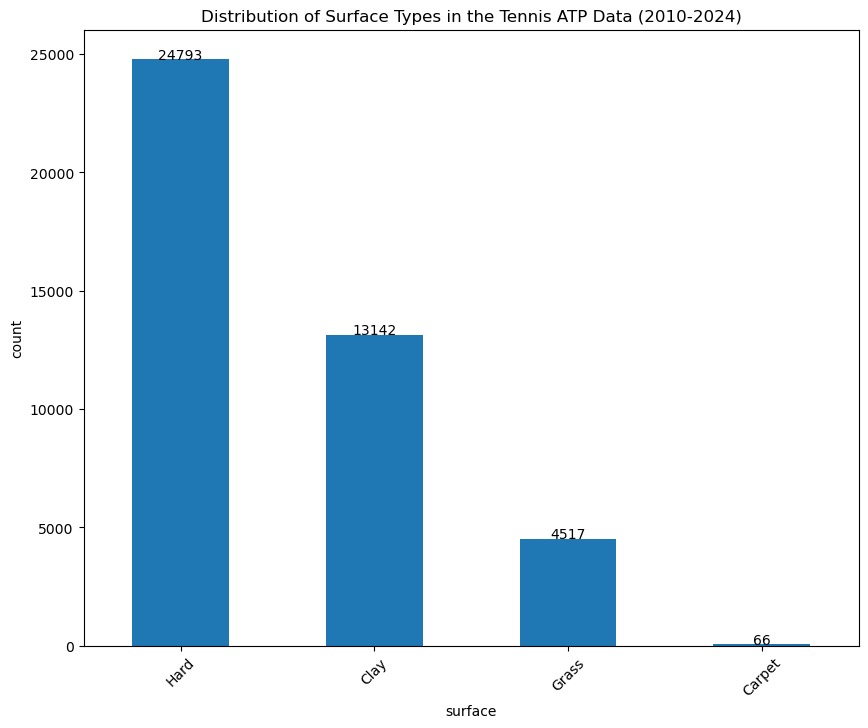

In [8]:
# surface
plt.figure(figsize=(10, 8))
plot = df.loc[df['y']==1]
plot['surface'].value_counts().plot.bar()

for i in range(len(plot['surface'].value_counts().index)):
        plt.text(i, plot['surface'].value_counts().values[i], plot['surface'].value_counts().values[i], ha='center') 

# Add labels and a title
plt.xlabel('surface')
plt.ylabel('count')
plt.title('Distribution of Surface Types in the Tennis ATP Data (2010-2024)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(figures, 'distribution of surface types.png'))

# Display the plot
plt.show()

In [9]:
carpet = df.loc[df['surface'] == 'Carpet'] #all davis cup matches, "World Cup of Tennis", ITF not ATP
print(carpet['tourney_name']) #no longer used in ATP since 2009, citing injuries

1308     Davis Cup G2 R1: IRL vs TUR
1312     Davis Cup G1 R1: JPN vs PHI
1320     Davis Cup G2 R1: IRL vs TUR
1332     Davis Cup G1 R1: JPN vs PHI
1355     Davis Cup G2 R1: IRL vs TUR
                    ...             
42289    Davis Cup G2 R1: FIN vs GEO
42306    Davis Cup G2 R1: FIN vs GEO
42314    Davis Cup G2 R1: MAR vs DEN
42322    Davis Cup G2 R1: MAR vs DEN
42336    Davis Cup G2 R1: FIN vs GEO
Name: tourney_name, Length: 132, dtype: object


In [ ]:
unique_hand = (
    df.groupby("Player_name_A")["Player_hand_A"]
      .agg(lambda x: x.dropna().unique())
      .apply(lambda arr: arr[0] if len(arr)==1 else np.nan)
)

unique_hand.value_counts(dropna=False)

Player_hand_A
R    1282
L     193
U     161
Name: count, dtype: int64

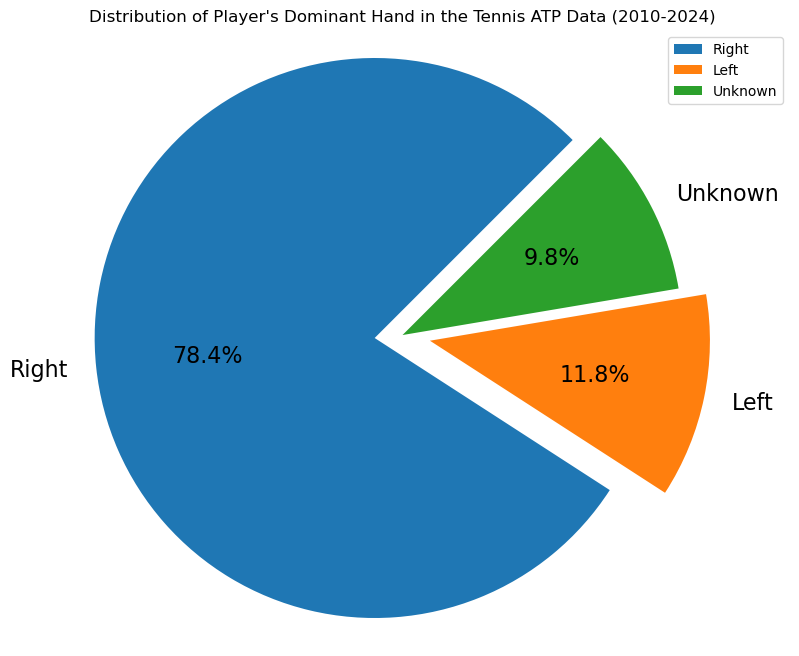

In [17]:
# hand
unique_hand = (
    df.groupby("Player_name_A")["Player_hand_A"]
      .agg(lambda x: x.dropna().unique())
      .apply(lambda arr: arr[0] if len(arr)==1 else np.nan)
)
cleaned = unique_hand.apply(lambda x: 
                            'U' if (x in ['A', None] or pd.isna(x)) else x)

counts = cleaned.value_counts().reindex(['R','L','U'], fill_value=0)

labels = ['Right', 'Left', 'Unknown']
values = counts.values

# Step 3: Pie chart
plt.figure(figsize=(10, 8))
explode = (0.1, 0.1, 0)   # highlight Right + Left

patches, texts, autotexts = plt.pie(
    values,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    startangle=45,
    textprops={'fontsize': 16}
)

#https://www.ebsco.com/research-starters/social-sciences-and-humanities/handedness

plt.title("Distribution of Player's Dominant Hand in the Tennis ATP Data (2010-2024)")
plt.axis('equal')

plt.legend()
plt.savefig(os.path.join(figures, 'distribution of player dominant hand types.png'))
plt.show()

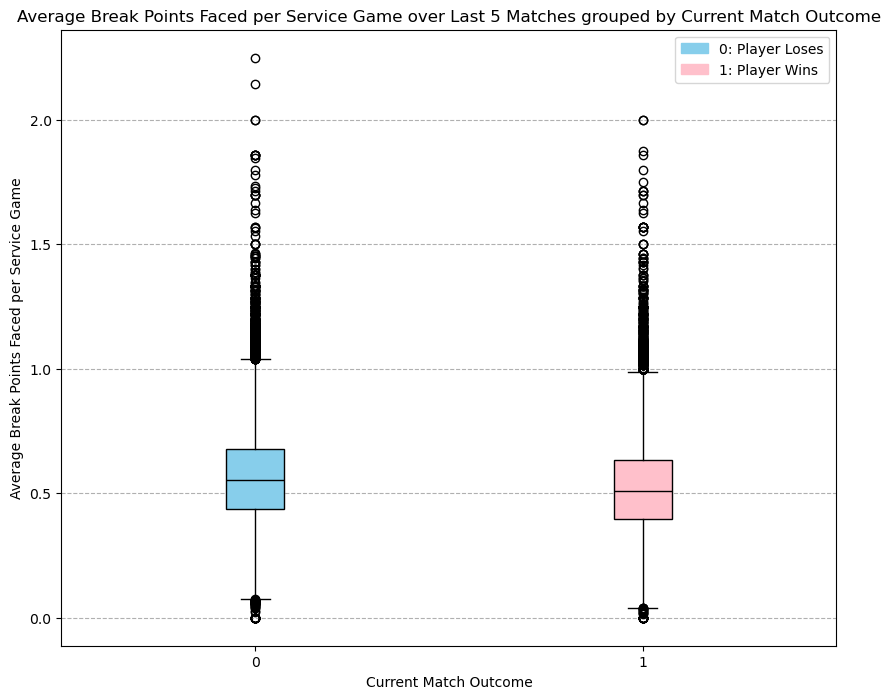

In [20]:
plot = df.dropna(subset=['last5_Player_bpFaced_per_SvGm_A'])
grouped = plot.groupby('y')['last5_Player_bpFaced_per_SvGm_A']
plt.figure(figsize=(10, 8))
boxplot = plt.boxplot(x =[group.values for name, group in grouped],
                     tick_labels=grouped.groups.keys(),
                     medianprops={'color': 'black'},
                     patch_artist=True)

colors = ['skyblue', 'pink']
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

legend_labels = ['0: Player Loses', '1: Player Wins']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels,loc='best')
plt.xlabel("Current Match Outcome")
plt.ylabel("Average Break Points Faced per Service Game")
plt.title('Average Break Points Faced per Service Game over Last 5 Matches grouped by Current Match Outcome')
plt.grid(axis='y', ls='--')
plt.savefig(os.path.join(figures, 'average break points faced per service game.png'))
plt.show()

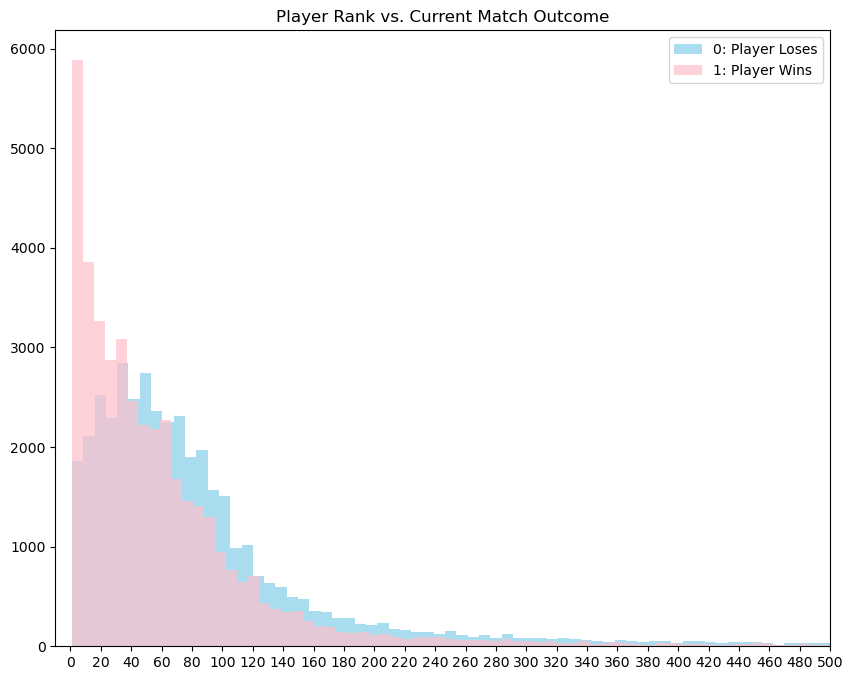

In [22]:
plot = df[['Player_rank_A', 'y']].dropna(subset=['Player_rank_A'])
grouped = plot.groupby('y')['Player_rank_A']
plt.figure(figsize=(10, 8))

custom_palette = {0: 'skyblue', 1: 'pink'}
for name, group in grouped:
    plt.hist(group.values, color = custom_palette[name],bins=round(len(plot)**0.5), alpha=0.7, label=name)

legend_labels = ['0: Player Loses', '1: Player Wins']
plt.legend(labels=legend_labels)
plt.title('Player Rank vs. Current Match Outcome')
plt.xlim(-10,500)
plt.xticks(np.arange(0, 501, 20))

plt.savefig(os.path.join(figures, 'player rank vs. current match outcome.png'))
plt.show()